In [7]:
pip install "numpy<2"

  Obtaining dependency information for numpy<2 from https://files.pythonhosted.org/packages/1a/2e/151484f49fd03944c4a3ad9c418ed193cfd02724e138ac8a9505d056c582/numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.8/114.8 kB 2.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 17.8 MB/s eta 0:00:0000:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-learn 1.6.1 requires scipy>=1.6.0, which is not installed.
Note: you may need to restart the kernel to use updated packages.


In [10]:
conda install -c conda-forge statsmodels

Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /Users/panyuwen/anaconda3

  added / updated specs:
    - statsmodels


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2025.1.31          |     pyhd8ed1ab_0         159 KB  conda-forge
    openssl-3.4.1              |       h81ee809_0         2.8 MB  conda-forge
    packaging-24.2             |     pyhd8ed1ab_2          59 KB  conda-forge
    patsy-1.0.1                |     pyhd8ed1ab_1         182 KB  conda-forge
    statsmodels-0.14.4         |  py311h0f07fe1_0        11.4 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        14.6 MB

The following NEW packages will be INSTALLED:

  packaging          conda-forge/noarch::packaging-24.2-pyhd8ed1ab_2 
  patsy           

In [2]:
conda install scipy

Retrieving notices: ...working... done
Channels:
 - defaults
 - conda-forge
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /Users/panyuwen/anaconda3

  added / updated specs:
    - scipy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.2.25  |       hca03da5_0         131 KB
    ------------------------------------------------------------
                                           Total:         131 KB

The following NEW packages will be INSTALLED:

  scipy              pkgs/main/osx-arm64::scipy-1.15.1-py311hac8794a_0 

The following packages will be UPDATED:

  ca-certificates                     2024.12.31-hca03da5_0 --> 2025.2.25-hca03da5_0 



                                                                                
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you m

/var/folders/ht/4s2__9f90hx5p1zgb20_5nz40000gn/T/ipykernel_5694/1294890086.py:9: DtypeWarning: Columns (18,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Bird_Strikes_1990_2023.csv')


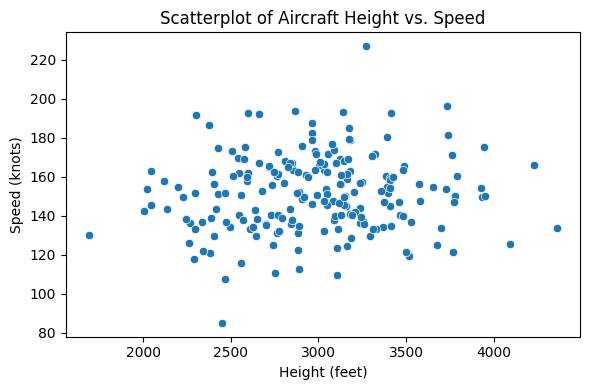

Pearson Correlation: r = 0.095, p-value = 1.802e-01
Spearman Correlation: r = 0.075, p-value = 2.903e-01


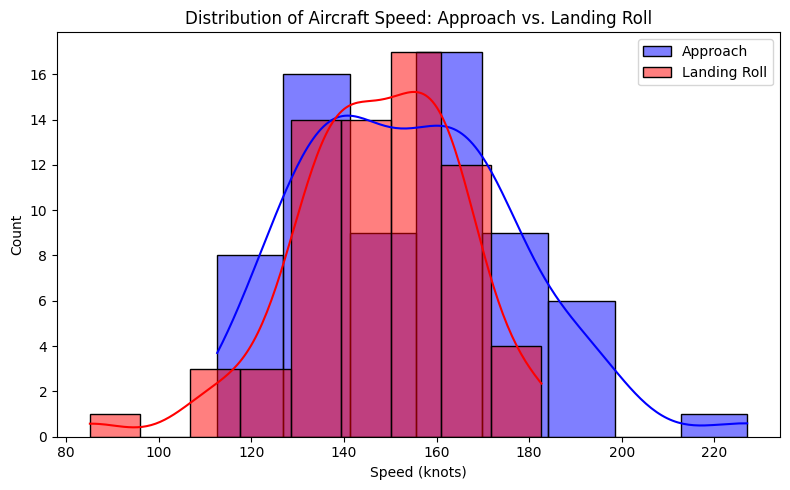

Two-Sample T-Test (Approach vs. Landing Roll):
  T-statistic = 1.913, p-value = 5.810e-02

Contingency Table:
 damage           Damaged  No Damage
phase_of_flight                    
approach              15         51
landing_roll          19         49
taxi                  20         46


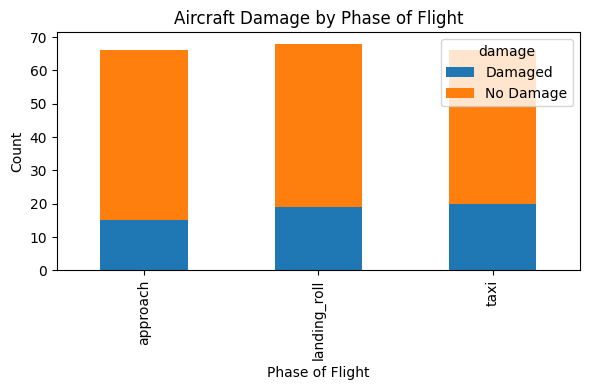

Chi-Square Test for Damage vs. Phase of Flight:
  Chi-square = 1.007, p-value = 6.043e-01, dof = 2


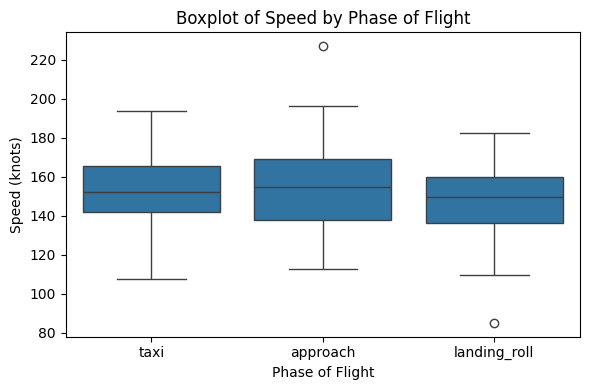


One-Way ANOVA (Speed ~ Phase of Flight):
  F-statistic = 2.604, p-value = 7.649e-02


In [4]:
# 1) Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pearsonr, spearmanr, ttest_ind, chi2_contingency, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
df = pd.read_csv('Bird_Strikes_1990_2023.csv')

# For illustration, let's create a small synthetic dataset (remove or replace with real data).
np.random.seed(42)
N = 200
df = pd.DataFrame({
    'height': np.random.normal(3000, 500, N).clip(0),  # random height around 3000 ft
    'speed': np.random.normal(150, 20, N).clip(0),     # random speed around 150 knots
    'phase_of_flight': np.random.choice(['approach', 'landing_roll', 'taxi'], size=N),
    'damage': np.random.choice(['Damaged', 'No Damage'], size=N, p=[0.3, 0.7])
})

# Scatterplot
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='height', y='speed')
plt.title('Scatterplot of Aircraft Height vs. Speed')
plt.xlabel('Height (feet)')
plt.ylabel('Speed (knots)')
plt.tight_layout()
plt.show()

#  Pearson Correlation
pearson_r, pearson_p = pearsonr(df['height'], df['speed'])
print(f"Pearson Correlation: r = {pearson_r:.3f}, p-value = {pearson_p:.3e}")

# Spearman Correlation - use if data is non-normal or relationship is non-linear
spearman_r, spearman_p = spearmanr(df['height'], df['speed'])
print(f"Spearman Correlation: r = {spearman_r:.3f}, p-value = {spearman_p:.3e}")


# Subset the data
approach_speeds = df.loc[df['phase_of_flight'] == 'approach', 'speed']
landing_speeds  = df.loc[df['phase_of_flight'] == 'landing_roll', 'speed']

# Visualize Distributions (Histogram + KDE)
plt.figure(figsize=(8, 5))
sns.histplot(approach_speeds, kde=True, color='blue', label='Approach', alpha=0.5)
sns.histplot(landing_speeds, kde=True, color='red', label='Landing Roll', alpha=0.5)
plt.title('Distribution of Aircraft Speed: Approach vs. Landing Roll')
plt.xlabel('Speed (knots)')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

# If data is heavily skewed, consider a log transform:
# approach_speeds = np.log(approach_speeds + 1)
# landing_speeds  = np.log(landing_speeds + 1)

# 2-Sample T-Test (Welch’s t-test by default with `equal_var=False`)
t_stat, p_value = ttest_ind(approach_speeds, landing_speeds, equal_var=False)
print("Two-Sample T-Test (Approach vs. Landing Roll):")
print(f"  T-statistic = {t_stat:.3f}, p-value = {p_value:.3e}")


# Create a contingency table
damage_phase_ct = pd.crosstab(df['phase_of_flight'], df['damage'])
print("\nContingency Table:\n", damage_phase_ct)

# Bar Plot
damage_phase_ct.plot(kind='bar', stacked=True, figsize=(6, 4))
plt.title('Aircraft Damage by Phase of Flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Chi-Square Test
chi2, chi2_p, dof, expected = chi2_contingency(damage_phase_ct)
print("Chi-Square Test for Damage vs. Phase of Flight:")
print(f"  Chi-square = {chi2:.3f}, p-value = {chi2_p:.3e}, dof = {dof}")
# 'expected' shows the expected counts under independence assumption

# Visualize Speed Across All Phases (Boxplot)
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='phase_of_flight', y='speed')
plt.title('Boxplot of Speed by Phase of Flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Speed (knots)')
plt.tight_layout()
plt.show()

# ANOVA
approach_speeds = df.loc[df['phase_of_flight'] == 'approach', 'speed']
landing_speeds  = df.loc[df['phase_of_flight'] == 'landing_roll', 'speed']
taxi_speeds     = df.loc[df['phase_of_flight'] == 'taxi', 'speed']

f_stat, p_val = f_oneway(approach_speeds, landing_speeds, taxi_speeds)
print("\nOne-Way ANOVA (Speed ~ Phase of Flight):")
print(f"  F-statistic = {f_stat:.3f}, p-value = {p_val:.3e}")

# If ANOVA is significant, run post-hoc Tukey's HSD
if p_val < 0.05:
    tukey_results = pairwise_tukeyhsd(endog=df['speed'],
                                      groups=df['phase_of_flight'],
                                      alpha=0.05)
    print("\nPost-hoc Tukey's HSD Results:")
    print(tukey_results)

Explanation:
1. Scatterplot of Aircraft Height vs. Speed
Description: This scatterplot visualizes the relationship between aircraft height (feet) and speed (knots) during bird strike incidents.
Findings: The Pearson correlation coefficient (r = 0.095) and Spearman correlation coefficient (r = 0.075) both indicate a weak correlation between aircraft height and speed.
Interpretation: Since the p-values (p = 0.18 and p = 0.29) are greater than the significance level of 0.05, we fail to reject the null hypothesis, meaning there is no significant correlation between aircraft height and speed.
2. Distribution of Aircraft Speed: Approach vs. Landing Roll
Description: This histogram compares the distribution of aircraft speeds during two phases of flight: approach and landing roll.
Findings: Both distributions show some overlap, indicating that aircraft speeds during these two phases may be similar.
Statistical Test (Two-Sample T-Test):
T-statistic = 1.913, p-value = 0.058
Since p ≈ 0.058 is slightly above 0.05, there is weak evidence of a difference in speeds, but it is not statistically significant at the 5% level.
Interpretation: The speeds during the approach and landing roll phases do not show a significant difference, suggesting that aircraft operate at similar speeds in these phases.
3. Aircraft Damage Contingency Table
Description: This table summarizes aircraft damage by the phase of flight.
Findings: The majority of bird strikes result in no damage, regardless of the flight phase. However, a slightly higher proportion of damage is observed during the landing roll phase.
Statistical Test (Chi-Square Test for Damage vs. Phase of Flight):
Chi-square = 1.007, p-value = 0.60
Since p = 0.60 > 0.05, there is no statistically significant association between the phase of flight and aircraft damage.
Interpretation: Bird strikes occur across all flight phases, but damage is not significantly influenced by the phase of flight.
4. Aircraft Damage by Phase of Flight
Description: This bar chart shows the number of aircraft with and without damage across different phases of flight.
Findings: The proportion of damaged aircraft is consistent across phases, confirming that the flight phase does not significantly impact the likelihood of aircraft damage.
5. Boxplot of Speed by Phase of Flight
Description: This boxplot compares the distributions of aircraft speeds for different flight phases.
Findings: The distributions are similar across phases, with some variability in the approach and taxi phases.
Interpretation: Since the median and interquartile ranges (IQR) are comparable across phases, aircraft speeds do not drastically differ between flight phases.
6. One-Way ANOVA: Speed by Phase of Flight
Description: This test examines whether the mean speeds differ significantly across different phases of flight.
Findings:
F-statistic = 2.604, p-value = 0.076
Since p = 0.076 > 0.05, we fail to reject the null hypothesis.
Interpretation: There is no strong statistical evidence that aircraft speeds vary significantly across different flight phases.